### Importing Libraries and dataset

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 100)
df=pd.read_csv("Propensity to Pay_Collections Data.csv")

C:\Users\baner\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\baner\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Viewing the Columns

In [3]:
df.columns

Index(['Cust_Num', 'Customer Group', 'Payment Method description',
       'DocumentNo', 'Doc. Date', 'Net due dt', 'Pstng Date', 'Amount',
       'Clearing Date', 'Clrng doc.', 'ZIPCODE', 'Region', 'City',
       'Customer Name', 'Age Of Customer(Months)', 'Age Of Customer(Year)',
       'Payment Term', 'Days Overdue (Delay)', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'],
      dtype='object')

### Dropping irrelevant columns

In [4]:
df=df.loc[:, :'Days Overdue (Delay)']
df=df.drop(['Customer Group', 'Doc. Date'], axis=1)
df.head()

,Cust_Num,Payment Method description,DocumentNo,Net due dt,Pstng Date,Amount,Clearing Date,Clrng doc.,ZIPCODE,Region,City,Customer Name,Age Of Customer(Months),Age Of Customer(Year),Payment Term,Days Overdue (Delay)
0,5039221123,Direct Debits 2,91225033129,28-Feb-15,14-Jan-15,"23,672.43",02-Mar-15,80992133504,AX0012,AA111,AA22,NM,34.0,2.0,45,2
1,5039221123,Direct Debits 2,91225033130,28-Feb-15,14-Jan-15,"3,689.47",02-Mar-15,80992133504,AX0012,AA111,AA22,NM,34.0,2.0,45,2
2,5039221123,Direct Debits 2,91225033131,28-Feb-15,15-Jan-15,366.84,02-Mar-15,80992133504,AX0012,AA111,AA22,NM,34.0,2.0,44,2
3,5039221116,Direct Debits 2,91225033132,28-Feb-15,23-Feb-15,259.84,02-Mar-15,80992133507,AX0013,AA112,AA23,AA31,65.0,5.0,5,2
4,5039221094,Direct Debits 2,91225033133,02-Mar-15,25-Feb-15,176.21,02-Mar-15,80992133508,AX0014,AA113,AA24,.,155.0,12.0,5,0


### Creating column Default (1 if default, 0 otherwise)

In [5]:
df['Default'] = np.where(df['Days Overdue (Delay)']> 0, 1, 0)

In [6]:
a=df.groupby('Cust_Num')['DocumentNo'].nunique()
b=pd.DataFrame(a)
c=df.groupby('Cust_Num')['Default'].sum()
d=pd.DataFrame(c)

Percent_of_defaulters=pd.concat([b, d], axis=1)
Percent_of_defaulters['Percent_default']=Percent_of_defaulters['Default']/Percent_of_defaulters['DocumentNo']
Percent_of_defaulters


,DocumentNo,Default,Percent_default
Cust_Num,,,
5039221069,20,18,0.900000
5039221070,341,172,0.504399
5039221071,36,8,0.222222
5039221072,102,51,0.500000
5039221073,39,22,0.564103
5039221074,216,100,0.462963
5039221075,72,23,0.319444
5039221076,121,115,0.950413
5039221077,6,2,0.333333


In [7]:
df['DocumentNo'].value_counts()

91225054395    2
91225037491    2
91225069565    1
91225058615    1
91225075023    1
              ..
91225062058    1
91225064085    1
91225066132    1
91225068183    1
91225067522    1
Name: DocumentNo, Length: 45839, dtype: int64

### Removing Document Numbers that are not unique

In [8]:
df = df[df['DocumentNo'] != 91225054395]
df = df[df['DocumentNo'] != 91225037491] 

In [9]:
z=df.groupby('Cust_Num')['Customer Name'].nunique()

In [10]:
x=df.groupby('Customer Name')['Cust_Num'].nunique()

In [11]:
df['Clearing Date'].isnull().sum()

0

### Converting to datetime datatype and extracting day, month and year

In [12]:
df['Net due dt'] = pd.to_datetime(df['Net due dt'])
df['Pstng Date'] = pd.to_datetime(df['Pstng Date'])

In [13]:
df['day_Posting_Date'] = df['Pstng Date'].dt.day
df['month_Posting_Date'] = df['Pstng Date'].dt.month
df['year_Posting_Date'] = df['Pstng Date'].dt.year
df['day_Net_due_date'] = df['Net due dt'].dt.day
df['month_Net_due_date'] = df['Net due dt'].dt.month
df['year_Net_due_date'] = df['Net due dt'].dt.year

### Cleaning Clearing Date column by adding Days Overdue to Net Due Date

In [14]:
df['Clearing Date']= df['Net due dt']+pd.to_timedelta(df['Days Overdue (Delay)'], unit='D')
df['Clearing Date'] = pd.to_datetime(df['Clearing Date'])

### Removing outliers(Posting Dates from 2011,2013)

In [15]:
df['year_Posting_Date'].value_counts()
df = df[df['year_Posting_Date'] != 2011]
df = df[df['year_Posting_Date'] != 2013]

### Getting Public Holiday Indicator for the posting date and net due date 

In [16]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start=df['Net due dt'].min(), end=df['Net due dt'].max())

df['Holiday_Net_due_date'] = df['Net due dt'].isin(holidays)

In [17]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start=df['Pstng Date'].min(), end=df['Pstng Date'].max())

df['Holiday_Posting_Date'] = df['Pstng Date'].isin(holidays)

### Generating Weekend Indicator for posting date and net due date

In [18]:
df['WEEKEND_Net_due_date'] = ((pd.DatetimeIndex(df['Net due dt']).dayofweek) // 5 == 1).astype(int)
df['WEEKEND_Posting_Date'] = ((pd.DatetimeIndex(df['Pstng Date']).dayofweek) // 5 == 1).astype(int)

In [19]:
import datetime as dt
df['days_of_week_Net_due_dt'] = df[['Net due dt']].apply(lambda x: dt.datetime.strftime(x['Net due dt'], '%A'), axis=1)
df['days_of_week_Posting_Date'] = df[['Pstng Date']].apply(lambda x: dt.datetime.strftime(x['Pstng Date'], '%A'), axis=1)

### Finding Percentage of Defaulter by Payment Method

In [20]:
a=df.groupby('Payment Method description')['Default'].sum()
b=pd.DataFrame(a)

c=df.groupby('Payment Method description')['DocumentNo'].nunique()
d=pd.DataFrame(c)

Percent_of_defaulters_by_payment=pd.concat([b, d], axis=1)
Percent_of_defaulters_by_payment['Percent_of_defaulters_by_payment']=Percent_of_defaulters_by_payment['Default']/Percent_of_defaulters_by_payment['DocumentNo']
b=Percent_of_defaulters_by_payment
b

,Default,DocumentNo,Percent_of_defaulters_by_payment
Payment Method description,,,
Direct Debits 1,8811,18981,0.464201
Direct Debits 2,14213,24009,0.591986
No Payment Method,960,1304,0.736196
Regulatory,54,771,0.070039
Regulatory 1,21,43,0.488372
Regulatory 2,152,604,0.251656
Third Part Payments,76,98,0.775510
Wire,9,24,0.375000


In [21]:
b.to_csv('Graph2.csv')

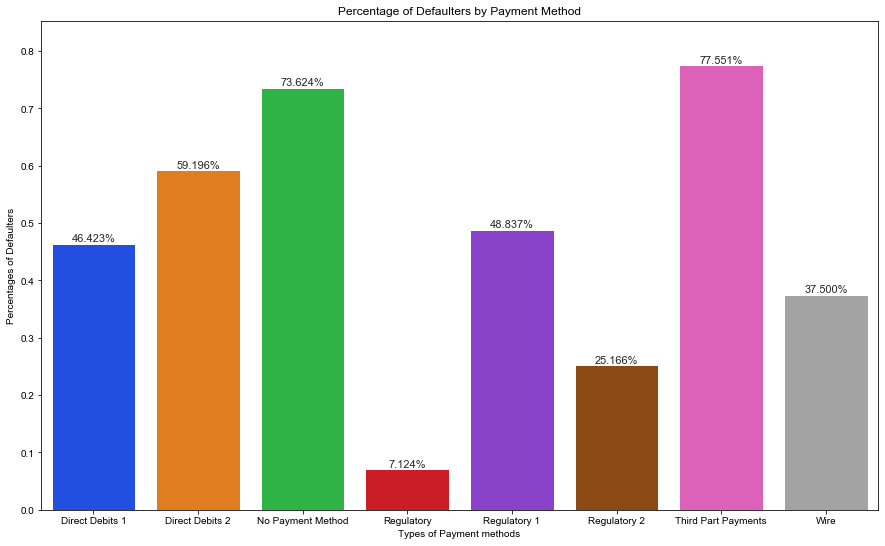

In [22]:
fig_dims = (15, 9)
fig, ax = plt.subplots(figsize=fig_dims)
frequencies= [0.464229,0.591962,0.736239, 0.071244,0.488372,0.251656,0.775510,0.375000]
values= ['Direct Debits 1','Direct Debits 2','No Payment Method','Regulatory','Regulatory 1','Regulatory 2','Third Part Payments','Wire']
title = f'Percentage of Defaulters by Payment Method' #Title for Bar Chart
sns.set_style('whitegrid')
axes = sns.barplot(x=values, y=frequencies, palette='bright') #Assigning x-axis, y-axis and selecting Colour for the chart
axes.set_title(title)
axes.set(xlabel='Types of Payment methods', ylabel='Percentages of Defaulters')    #Labels for x-axis and y-axis
axes.set_ylim(top=max(frequencies) * 1.10)

for bar, frequency in zip(axes.patches, frequencies):
    text_x = bar.get_x() + bar.get_width() / 2.0  
    text_y = bar.get_height() 
    text = f'{frequency / 1:.3%}'
    axes.text(text_x, text_y, text, 
              fontsize=11, ha='center', va='bottom')


### Creating Target Variable (Did not Default, Defaulted within 30 days, Defaulted within 60 days, Defaulted more than 60 days)

In [23]:
def alert(c):
      if c['Days Overdue (Delay)'] <=0:
        return 0
      elif 0<c['Days Overdue (Delay)']<=30:
        return 1
      elif 30 < c['Days Overdue (Delay)'] <= 60:
        return 2
      else:
        return 3

df['Classification'] = df.apply(alert, axis=1)


### Checking Regions where the majority of defaults occur

In [24]:
a=df.groupby('ZIPCODE')['Default'].sum()
b=pd.DataFrame(a)
c=df.groupby('ZIPCODE')['DocumentNo']. nunique()
d=pd.DataFrame(c)


Percent_of_defaulters_by_zipcode=pd.concat([b, d], axis=1)
Percent_of_defaulters_by_zipcode['Percent_default']=Percent_of_defaulters_by_zipcode['Default']/Percent_of_defaulters_by_zipcode['DocumentNo']
r=Percent_of_defaulters_by_zipcode.sort_values(by=['Percent_default'], ascending=False)

In [25]:
a=df.groupby('Region')['Default'].sum()
b=pd.DataFrame(a)
c=df.groupby('Region')['DocumentNo']. nunique()
d=pd.DataFrame(c)


Percent_of_defaulters_by_region=pd.concat([b, d], axis=1)
Percent_of_defaulters_by_region['Percent_default']=Percent_of_defaulters_by_region['Default']/Percent_of_defaulters_by_region['DocumentNo']
a=Percent_of_defaulters_by_region.sort_values(by=['Percent_default'], ascending=False)

In [26]:
b=a[a['DocumentNo']>30]
b
b.to_csv('Graph3.csv')
b

,Default,DocumentNo,Percent_default
Region,,,
AA127,4949,6367,0.777289
AA133,39,56,0.696429
AA126,1074,1562,0.687580
AA124,179,287,0.623693
AA122,31,50,0.620000
AA121,4318,8054,0.536131
AA113,5091,9712,0.524197
AA132,172,341,0.504399
AA129,51,102,0.500000


In [27]:
a=df.groupby('City')['Default'].sum()
b=pd.DataFrame(a)
c=df.groupby('City')['DocumentNo']. nunique()
d=pd.DataFrame(c)


Percent_of_defaulters_by_city=pd.concat([b, d], axis=1)
Percent_of_defaulters_by_city['Percent_default']=Percent_of_defaulters_by_city['Default']/Percent_of_defaulters_by_city['DocumentNo']
y=Percent_of_defaulters_by_city.sort_values(by=['Percent_default'], ascending=False)

### Cleaning Amount column

In [28]:
df['Amount']=df['Amount'].str.replace(',','')

In [29]:
df['Amount']=df['Amount'].astype(float)

In [30]:
df

,Cust_Num,Payment Method description,DocumentNo,Net due dt,Pstng Date,Amount,Clearing Date,Clrng doc.,ZIPCODE,Region,...,day_Net_due_date,month_Net_due_date,year_Net_due_date,Holiday_Net_due_date,Holiday_Posting_Date,WEEKEND_Net_due_date,WEEKEND_Posting_Date,days_of_week_Net_due_dt,days_of_week_Posting_Date,Classification
0,5039221123,Direct Debits 2,91225033129,2015-02-28,2015-01-14,23672.43,2015-03-02,80992133504,AX0012,AA111,...,28,2,2015,False,False,1,0,Saturday,Wednesday,1
1,5039221123,Direct Debits 2,91225033130,2015-02-28,2015-01-14,3689.47,2015-03-02,80992133504,AX0012,AA111,...,28,2,2015,False,False,1,0,Saturday,Wednesday,1
2,5039221123,Direct Debits 2,91225033131,2015-02-28,2015-01-15,366.84,2015-03-02,80992133504,AX0012,AA111,...,28,2,2015,False,False,1,0,Saturday,Thursday,1
3,5039221116,Direct Debits 2,91225033132,2015-02-28,2015-02-23,259.84,2015-03-02,80992133507,AX0013,AA112,...,28,2,2015,False,False,1,0,Saturday,Monday,1
4,5039221094,Direct Debits 2,91225033133,2015-03-02,2015-02-25,176.21,2015-03-02,80992133508,AX0014,AA113,...,2,3,2015,False,False,0,0,Monday,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45836,5039221078,No Payment Method,91225078963,2016-04-03,2015-12-10,33330.94,2016-04-16,80992179294,AX0045,AA126,...,3,4,2016,False,False,1,0,Sunday,Thursday,1
45837,5039221106,No Payment Method,91225078964,2016-03-04,2015-10-11,6781.28,2016-02-06,80992179341,AX0044,AA126,...,4,3,2016,False,False,0,1,Friday,Sunday,0
45838,5039221082,No Payment Method,91225078965,2016-03-04,2015-11-27,2724.62,2016-02-06,80992179341,AX0049,AA126,...,4,3,2016,False,False,0,0,Friday,Friday,0
45839,5039221082,No Payment Method,91225078966,2016-03-04,2015-11-24,2353.44,2016-02-06,80992179341,AX0049,AA126,...,4,3,2016,False,False,0,0,Friday,Tuesday,0


## Modelling

### Dropping Irrelevant columns for modelling

In [31]:
df2=df.drop(['DocumentNo','Net due dt','Pstng Date','Clearing Date','Clrng doc.','Customer Name','Days Overdue (Delay)'], axis=1)

In [32]:
df2

,Cust_Num,Payment Method description,Amount,ZIPCODE,Region,City,Age Of Customer(Months),Age Of Customer(Year),Payment Term,Default,...,day_Net_due_date,month_Net_due_date,year_Net_due_date,Holiday_Net_due_date,Holiday_Posting_Date,WEEKEND_Net_due_date,WEEKEND_Posting_Date,days_of_week_Net_due_dt,days_of_week_Posting_Date,Classification
0,5039221123,Direct Debits 2,23672.43,AX0012,AA111,AA22,34.0,2.0,45,1,...,28,2,2015,False,False,1,0,Saturday,Wednesday,1
1,5039221123,Direct Debits 2,3689.47,AX0012,AA111,AA22,34.0,2.0,45,1,...,28,2,2015,False,False,1,0,Saturday,Wednesday,1
2,5039221123,Direct Debits 2,366.84,AX0012,AA111,AA22,34.0,2.0,44,1,...,28,2,2015,False,False,1,0,Saturday,Thursday,1
3,5039221116,Direct Debits 2,259.84,AX0013,AA112,AA23,65.0,5.0,5,1,...,28,2,2015,False,False,1,0,Saturday,Monday,1
4,5039221094,Direct Debits 2,176.21,AX0014,AA113,AA24,155.0,12.0,5,0,...,2,3,2015,False,False,0,0,Monday,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45836,5039221078,No Payment Method,33330.94,AX0045,AA126,AA55,155.0,12.0,144,1,...,3,4,2016,False,False,1,0,Sunday,Thursday,1
45837,5039221106,No Payment Method,6781.28,AX0044,AA126,AA54,118.0,9.0,145,0,...,4,3,2016,False,False,0,1,Friday,Sunday,0
45838,5039221082,No Payment Method,2724.62,AX0049,AA126,AA58,155.0,12.0,128,0,...,4,3,2016,False,False,0,0,Friday,Friday,0
45839,5039221082,No Payment Method,2353.44,AX0049,AA126,AA58,155.0,12.0,131,0,...,4,3,2016,False,False,0,0,Friday,Tuesday,0


In [33]:
df2.to_csv('For nishi.csv')

### Getting dummies for categorical variables

In [34]:
Payment_Method_description_dummies = pd.get_dummies(df2['Payment Method description'], prefix='Payment Method description')
Region_dummies = pd.get_dummies(df2.Region, prefix='Region')
month_Posting_Date_dummies = pd.get_dummies(df2.month_Posting_Date, prefix='month_Posting_Date')
year_Posting_Date_dummies = pd.get_dummies(df2.year_Posting_Date, prefix='year_Posting_Date')
month_Net_due_date_dummies = pd.get_dummies(df2.month_Net_due_date, prefix='month_Net_due_date')
year_Net_due_date_dummies = pd.get_dummies(df2.year_Net_due_date, prefix='year_Net_due_date')
Holiday_Net_due_date_dummies = pd.get_dummies(df2.Holiday_Net_due_date, prefix='Holiday_Net_due_date')
Holiday_Posting_Date_dummies = pd.get_dummies(df2.Holiday_Posting_Date, prefix='Holiday_Posting_Date')
WEEKEND_Net_due_date_dummies = pd.get_dummies(df2.WEEKEND_Net_due_date, prefix='WEEKEND_Net_due_date')
WEEKEND_Posting_Date_dummies = pd.get_dummies(df2.WEEKEND_Posting_Date, prefix='WEEKEND_Posting_Date')
days_of_week_Net_due_dt_dummies = pd.get_dummies(df2.days_of_week_Net_due_dt, prefix='days_of_week_Net_due_dt')
days_of_week_Posting_Date_dummies = pd.get_dummies(df2.days_of_week_Posting_Date, prefix='days_of_week_Posting_Date')
Cust_Num = pd.get_dummies(df2.Cust_Num, prefix='Cust_Num')
ZIPCODE = pd.get_dummies(df2.ZIPCODE, prefix='ZIPCODE')
City = pd.get_dummies(df2.City, prefix='City')



In [35]:
df3 = pd.concat([df2,Payment_Method_description_dummies,Region_dummies,month_Posting_Date_dummies,year_Posting_Date_dummies,month_Net_due_date_dummies,year_Net_due_date_dummies,Holiday_Net_due_date_dummies,Holiday_Posting_Date_dummies,WEEKEND_Net_due_date_dummies,WEEKEND_Posting_Date_dummies,days_of_week_Net_due_dt_dummies,days_of_week_Posting_Date_dummies,Cust_Num,ZIPCODE,City], axis=1)


In [36]:
df4=df3.drop(['day_Posting_Date',"day_Net_due_date",'Payment Method description','Region','month_Posting_Date','year_Posting_Date','month_Net_due_date','year_Net_due_date','Holiday_Net_due_date','Holiday_Posting_Date','WEEKEND_Net_due_date','WEEKEND_Posting_Date','days_of_week_Net_due_dt','days_of_week_Posting_Date','Cust_Num','ZIPCODE','City'], axis=1)
df4

,Amount,Age Of Customer(Months),Age Of Customer(Year),Payment Term,Default,Classification,Payment Method description_Direct Debits 1,Payment Method description_Direct Debits 2,Payment Method description_No Payment Method,Payment Method description_Regulatory,...,City_AA75,City_AA76,City_AA77,City_AA78,City_AA79,City_AA80,City_AA81,City_AA82,City_AA83,City_AA84
0,23672.43,34.0,2.0,45,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3689.47,34.0,2.0,45,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,366.84,34.0,2.0,44,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,259.84,65.0,5.0,5,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,176.21,155.0,12.0,5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45836,33330.94,155.0,12.0,144,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
45837,6781.28,118.0,9.0,145,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
45838,2724.62,155.0,12.0,128,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
45839,2353.44,155.0,12.0,131,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df4.to_csv('final4.csv')

In [38]:
df4.head()

,Amount,Age Of Customer(Months),Age Of Customer(Year),Payment Term,Default,Classification,Payment Method description_Direct Debits 1,Payment Method description_Direct Debits 2,Payment Method description_No Payment Method,Payment Method description_Regulatory,...,City_AA75,City_AA76,City_AA77,City_AA78,City_AA79,City_AA80,City_AA81,City_AA82,City_AA83,City_AA84
0,23672.43,34.0,2.0,45,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3689.47,34.0,2.0,45,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,366.84,34.0,2.0,44,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,259.84,65.0,5.0,5,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,176.21,155.0,12.0,5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df5=df4.drop(['Default'],axis=1)

In [40]:
'Cust_Num',"ZIPCODE","City", 

('Cust_Num', 'ZIPCODE', 'City')

### Creating Train Test Split

In [41]:
y=df5[['Classification']]
X=df5.drop(['Classification'], axis=1)


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

          Amount  Age Of Customer(Months)  Age Of Customer(Year)  \
14278     482.49                    155.0                   12.0   
7071   171920.39                    155.0                   12.0   
28050    4155.29                    155.0                   12.0   
6837   102453.23                    155.0                   12.0   
14349    4760.08                    155.0                   12.0   
...          ...                      ...                    ...   
30410   48628.29                    155.0                   12.0   
21244      98.98                    155.0                   12.0   
42620     824.32                    155.0                   12.0   
43574    3408.66                    155.0                   12.0   
2732    30929.46                    155.0                   12.0   

       Payment Term  Payment Method description_Direct Debits 1  \
14278             5                                           0   
7071              5                              

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-0.26689473  0.20972442  0.20320657 ... -0.02998685 -0.02955498
  -0.00877564]
 [ 2.41964688  0.20972442  0.20320657 ... -0.02998685 -0.02955498
  -0.00877564]
 [-0.2093396   0.20972442  0.20320657 ... -0.02998685 -0.02955498
  -0.00877564]
 ...
 [-0.26153804  0.20972442  0.20320657 ... -0.02998685 -0.02955498
  -0.00877564]
 [-0.22103977  0.20972442  0.20320657 ... -0.02998685 -0.02955498
  -0.00877564]
 [ 0.21022877  0.20972442  0.20320657 ... -0.02998685 -0.02955498
  -0.00877564]]
[[-0.27293278 -0.31018778  0.20320657 ... -0.02998685 -0.02955498
  -0.00877564]
 [-0.23473482  0.20972442  0.20320657 ... -0.02998685 -0.02955498
  -0.00877564]
 [ 0.16048358  0.20972442  0.20320657 ... -0.02998685 -0.02955498
  -0.00877564]
 ...
 [-0.26874731  0.20972442  0.20320657 ... -0.02998685 -0.02955498
  -0.00877564]
 [ 0.18585294  0.20972442  0.20320657 ... -0.02998685 -0.02955498
  -0.00877564]
 [-0.16833126  0.20972442  0.20320657 ... -0.02998685 -0.02955498
  -0.00877564]]


### Running a Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

C:\Users\baner\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3119   78    1    2]
 [  75 3483    1    2]
 [   1    4   84    0]
 [   3    2    0   21]]


0.9754217568353694

### Running a gridsearch

In [49]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 800, 1400, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 60, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
classifier = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [1566]:
y_pred = rf_random.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [1567]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3123   77    0    0]
 [  71 3488    1    1]
 [   1    5   83    0]
 [   3    2    0   21]]


0.9765852239674229

In [1568]:
from sklearn.metrics import classification_report
target_names = ['Did not default', 'Default(0-30days)', 'Default(30-60days)','Default(>60days)']
print(classification_report(y_test, y_pred, target_names=target_names))

                    precision    recall  f1-score   support

   Did not default       0.98      0.98      0.98      3200
 Default(0-30days)       0.98      0.98      0.98      3561
Default(30-60days)       0.99      0.93      0.96        89
  Default(>60days)       0.95      0.81      0.88        26

          accuracy                           0.98      6876
         macro avg       0.97      0.92      0.95      6876
      weighted avg       0.98      0.98      0.98      6876



### Running Boosting Algorithm

In [47]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

C:\Users\baner\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\baner\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3113   86    0    1]
 [  40 3516    1    4]
 [   0    4   85    0]
 [   3    1    0   22]]


0.9796393251890634

In [50]:
from sklearn.metrics import classification_report
target_names = ['Did not default', 'Default(0-30days)', 'Default(30-60days)','Default(>60days)']
print(classification_report(y_test, y_pred, target_names=target_names))


                    precision    recall  f1-score   support

   Did not default       0.99      0.97      0.98      3200
 Default(0-30days)       0.97      0.99      0.98      3561
Default(30-60days)       0.99      0.96      0.97        89
  Default(>60days)       0.81      0.85      0.83        26

          accuracy                           0.98      6876
         macro avg       0.94      0.94      0.94      6876
      weighted avg       0.98      0.98      0.98      6876



### Running Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\baner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\baner\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
y_pred = lr.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2566  627    1    6]
 [ 570 2990    0    1]
 [   1    6   82    0]
 [   8    1    0   17]]


0.8224258289703316

In [61]:
from sklearn.metrics import classification_report
target_names = ['Did not default', 'Default(0-30days)', 'Default(30-60days)','Default(>60days)']
print(classification_report(y_test, y_pred, target_names=target_names))

                    precision    recall  f1-score   support

   Did not default       0.82      0.80      0.81      3200
 Default(0-30days)       0.83      0.84      0.83      3561
Default(30-60days)       0.99      0.92      0.95        89
  Default(>60days)       0.71      0.65      0.68        26

          accuracy                           0.82      6876
         macro avg       0.83      0.80      0.82      6876
      weighted avg       0.82      0.82      0.82      6876



## Clearly, Random Forest Gives us the highest accuracy and f1-score

### MORE EDA

In [51]:
df5.head()

,Amount,Age Of Customer(Months),Age Of Customer(Year),Payment Term,Classification,Payment Method description_Direct Debits 1,Payment Method description_Direct Debits 2,Payment Method description_No Payment Method,Payment Method description_Regulatory,Payment Method description_Regulatory 1,...,City_AA75,City_AA76,City_AA77,City_AA78,City_AA79,City_AA80,City_AA81,City_AA82,City_AA83,City_AA84
0,23672.43,34.0,2.0,45,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3689.47,34.0,2.0,45,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,366.84,34.0,2.0,44,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,259.84,65.0,5.0,5,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,176.21,155.0,12.0,5,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
a=df.groupby('Region')['Default'].sum()
b=pd.DataFrame(a)
c=df.groupby('Region')['DocumentNo']. nunique()
d=pd.DataFrame(c)


Percent_of_defaulters_by_region=pd.concat([b, d], axis=1)
Percent_of_defaulters_by_region['Percent_default']=Percent_of_defaulters_by_region['Default']/Percent_of_defaulters_by_region['DocumentNo']
Percent_of_defaulters_by_region.sort_values(by=['Percent_default'], ascending=False)

,Default,DocumentNo,Percent_default
Region,,,
AA140,3,3,1.000000
AA127,4949,6367,0.777289
AA133,39,56,0.696429
AA126,1074,1562,0.687580
AA124,179,287,0.623693
AA122,31,50,0.620000
AA121,4318,8054,0.536131
AA136,10,19,0.526316
AA113,5091,9712,0.524197


In [53]:
df3['days_of_week_Net_due_dt'].value_counts()

Saturday     11133
Sunday        7971
Monday        7882
Tuesday       7790
Wednesday     7714
Thursday      1807
Friday        1537
Name: days_of_week_Net_due_dt, dtype: int64

In [54]:
a=df.groupby('days_of_week_Net_due_dt')['Default'].sum()
b=pd.DataFrame(a)
c=df.groupby('days_of_week_Net_due_dt')['DocumentNo']. nunique()
d=pd.DataFrame(c)


Percent_of_defaulters_by_days_net=pd.concat([b, d], axis=1)
Percent_of_defaulters_by_days_net['Percent_default']=Percent_of_defaulters_by_days_net['Default']/Percent_of_defaulters_by_days_net['DocumentNo']
a=Percent_of_defaulters_by_days_net.sort_values(by=['Percent_default'], ascending=False)

a.to_csv('Graph.csv')



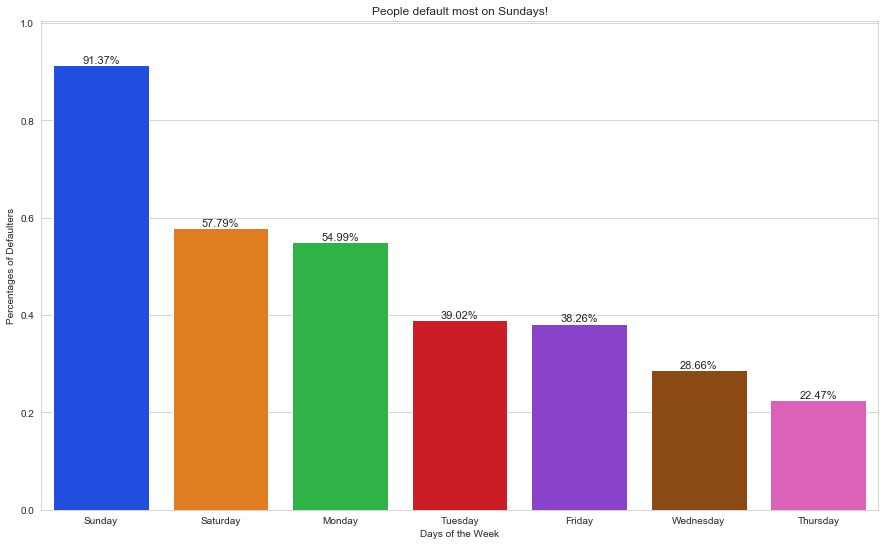

In [55]:
fig_dims = (15, 9)
fig, ax = plt.subplots(figsize=fig_dims)
frequencies= [0.913687,0.577921,0.549860,0.390244,0.382563,0.286622,0.224682]
values= ['Sunday','Saturday','Monday','Tuesday','Friday','Wednesday','Thursday']
title = f'People default most on Sundays!' #Title for Bar Chart
sns.set_style('whitegrid')
sns.color_palette("rocket")

axes = sns.barplot(x=values, y=frequencies, palette='bright') #Assigning x-axis, y-axis and selecting Colour for the chart
axes.set_title(title)
axes.set(xlabel='Days of the Week', ylabel='Percentages of Defaulters')    #Labels for x-axis and y-axis
axes.set_ylim(top=max(frequencies) * 1.10)

for bar, frequency in zip(axes.patches, frequencies):
    text_x = bar.get_x() + bar.get_width() / 2.0  
    text_y = bar.get_height() 
    text = f'{frequency / 1:.2%}'
    
    axes.text(text_x, text_y, text, 
              fontsize=11, ha='center', va='bottom')


Shape of your Data Set: (45834, 21)
Classifying variables in data set...
    21 Predictors classified...
        This does not include the Target column(s)
        2 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3
Could not draw Distribution Plot
Could not draw Heat Map
Could not draw Date Vars
Time to run AutoViz (in seconds) = 10.842


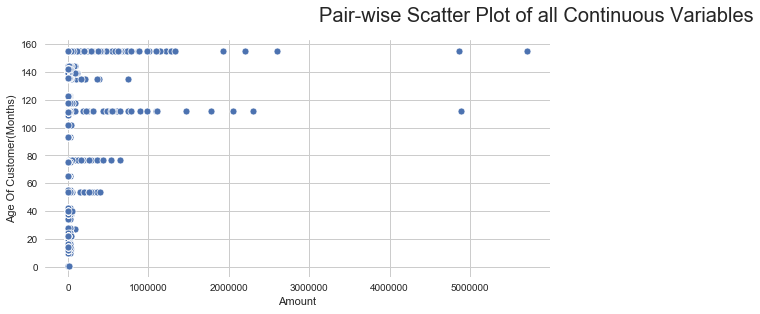

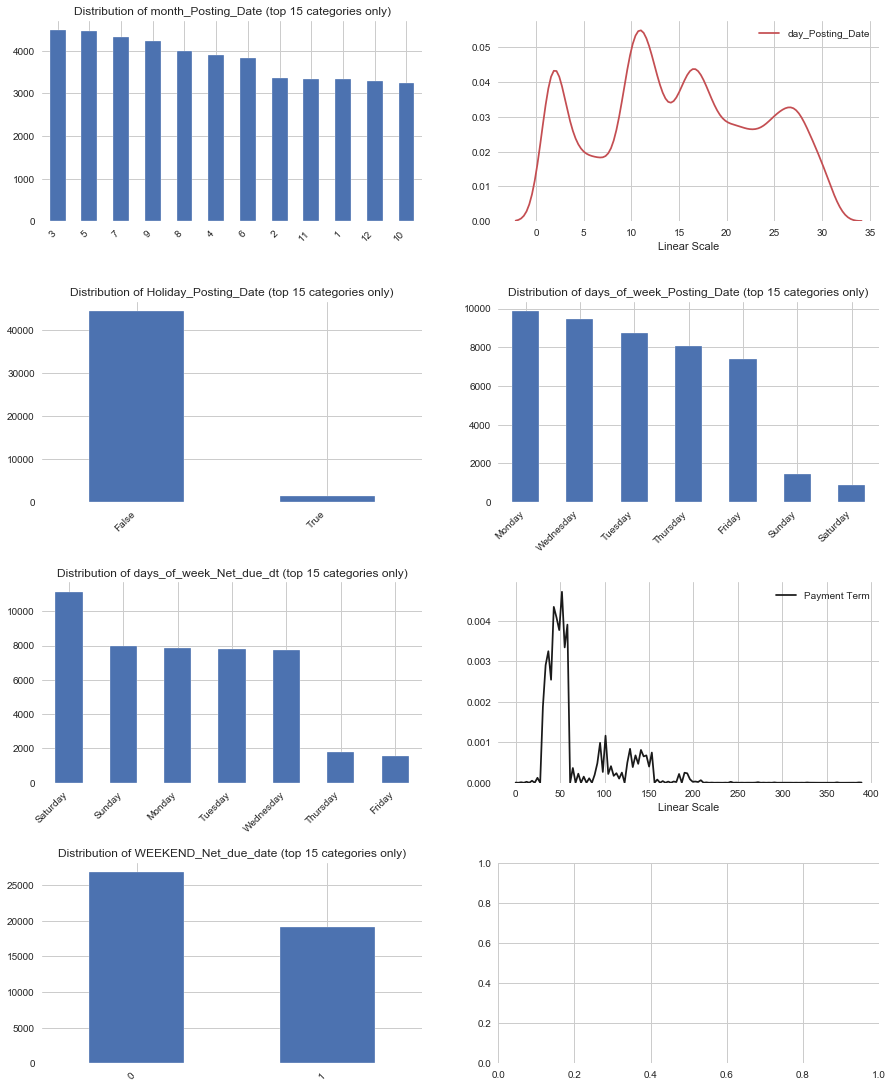

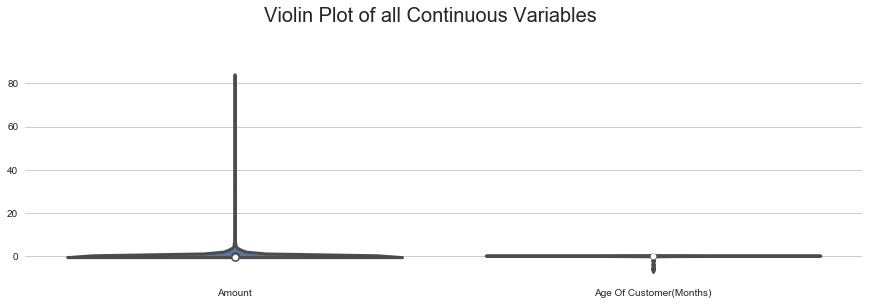

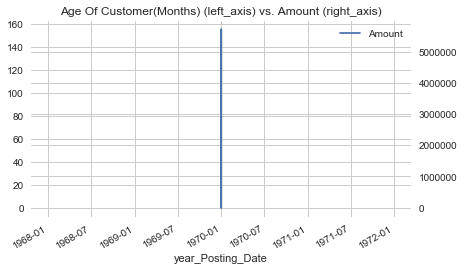

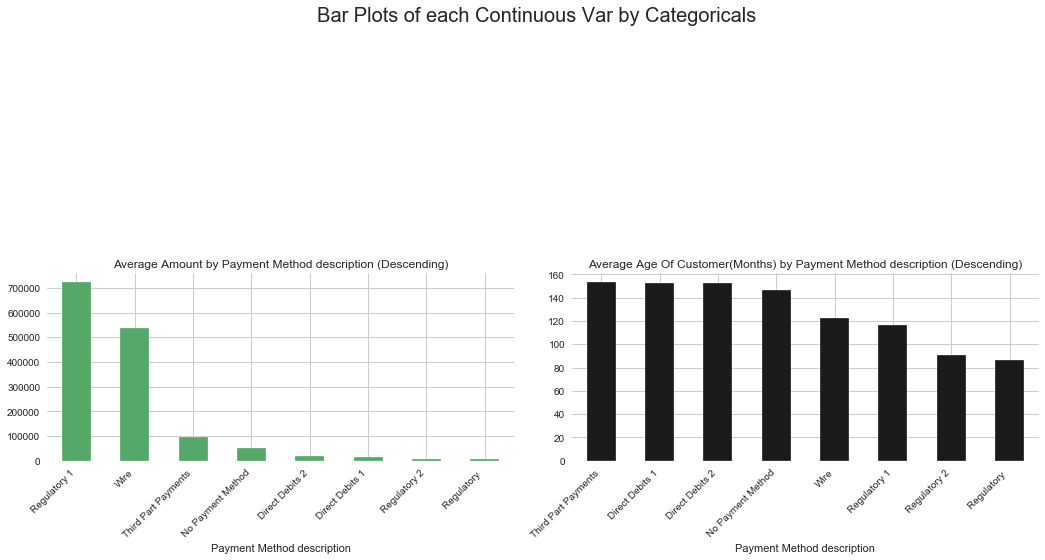

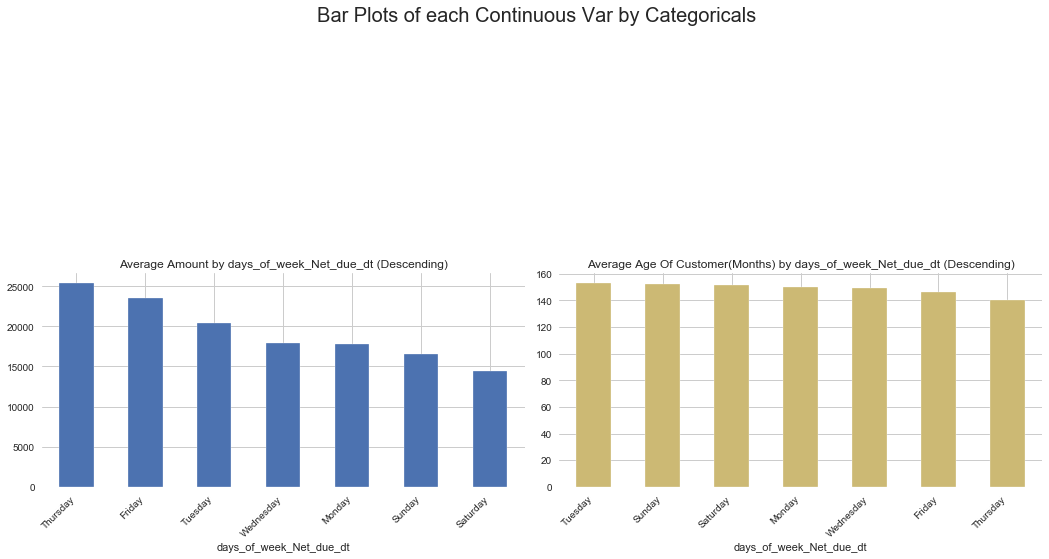

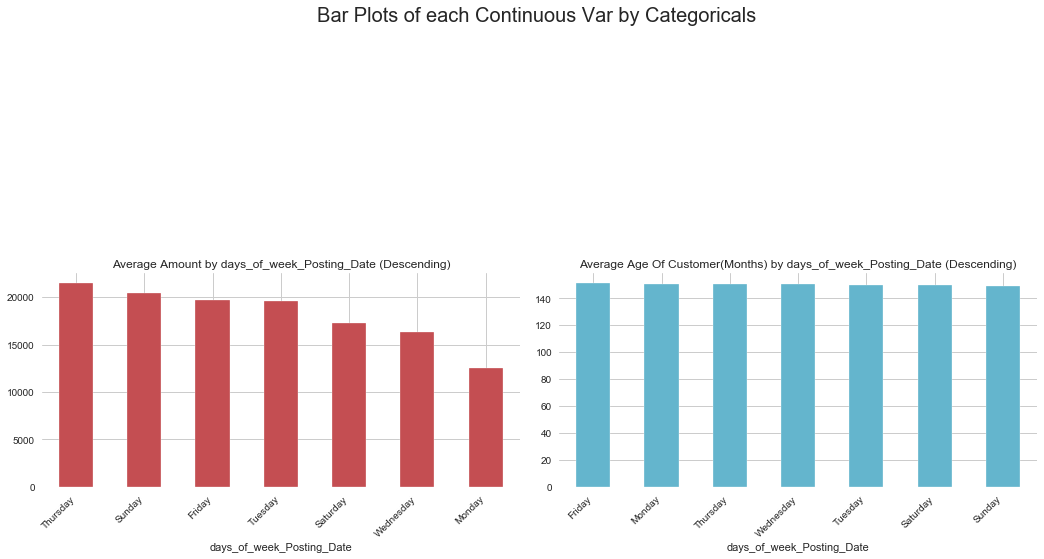

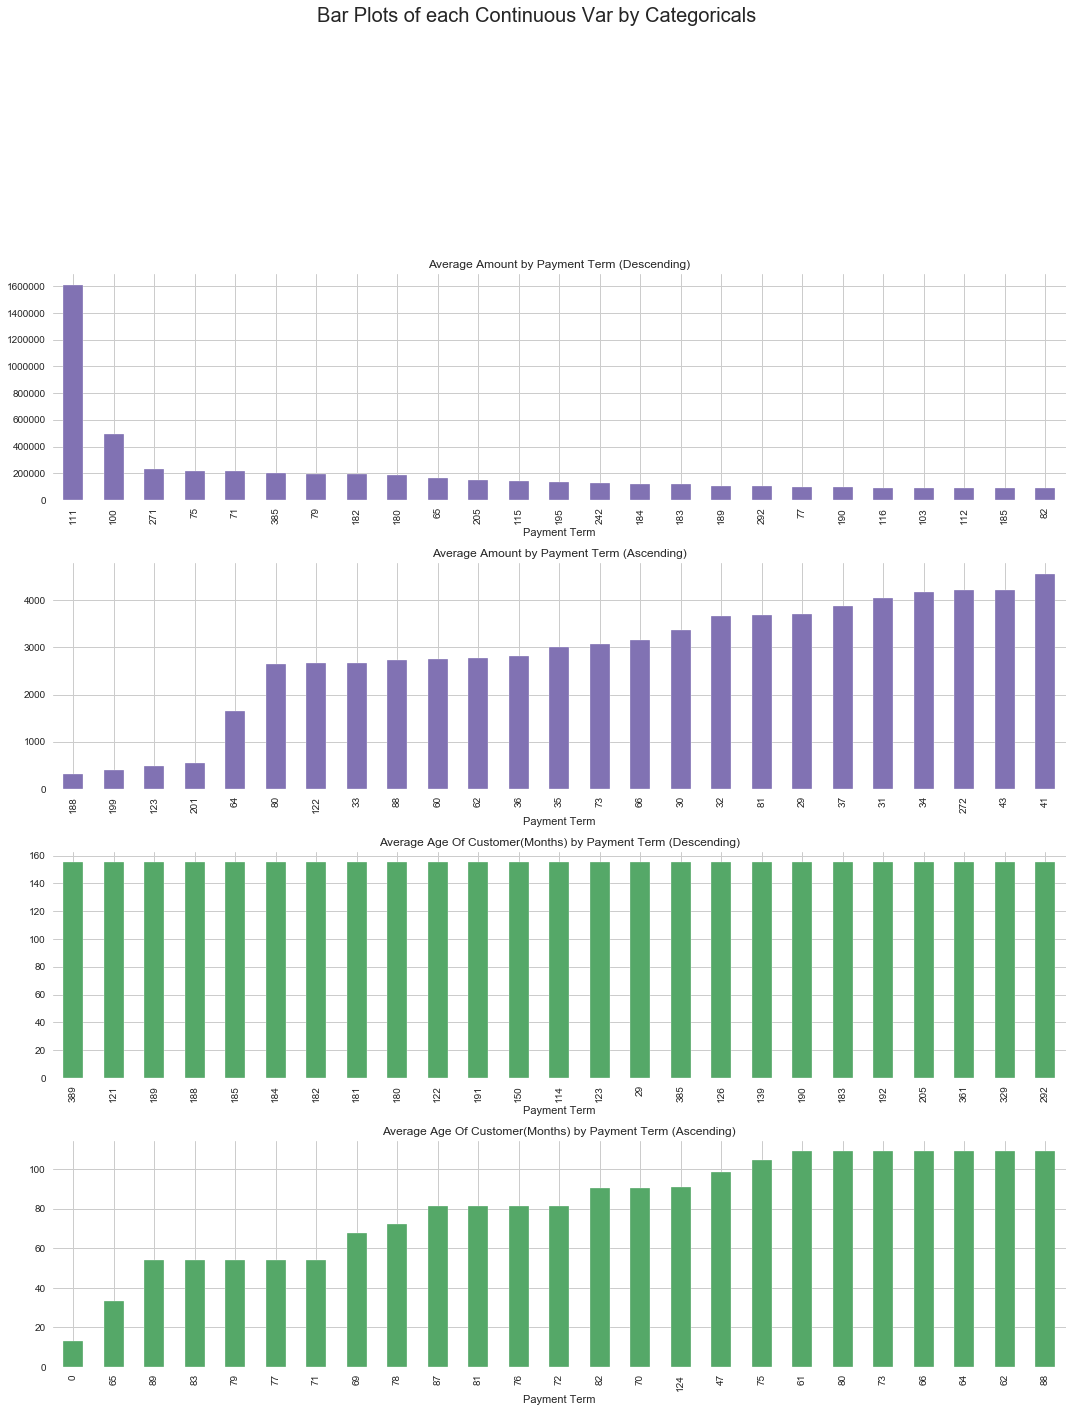

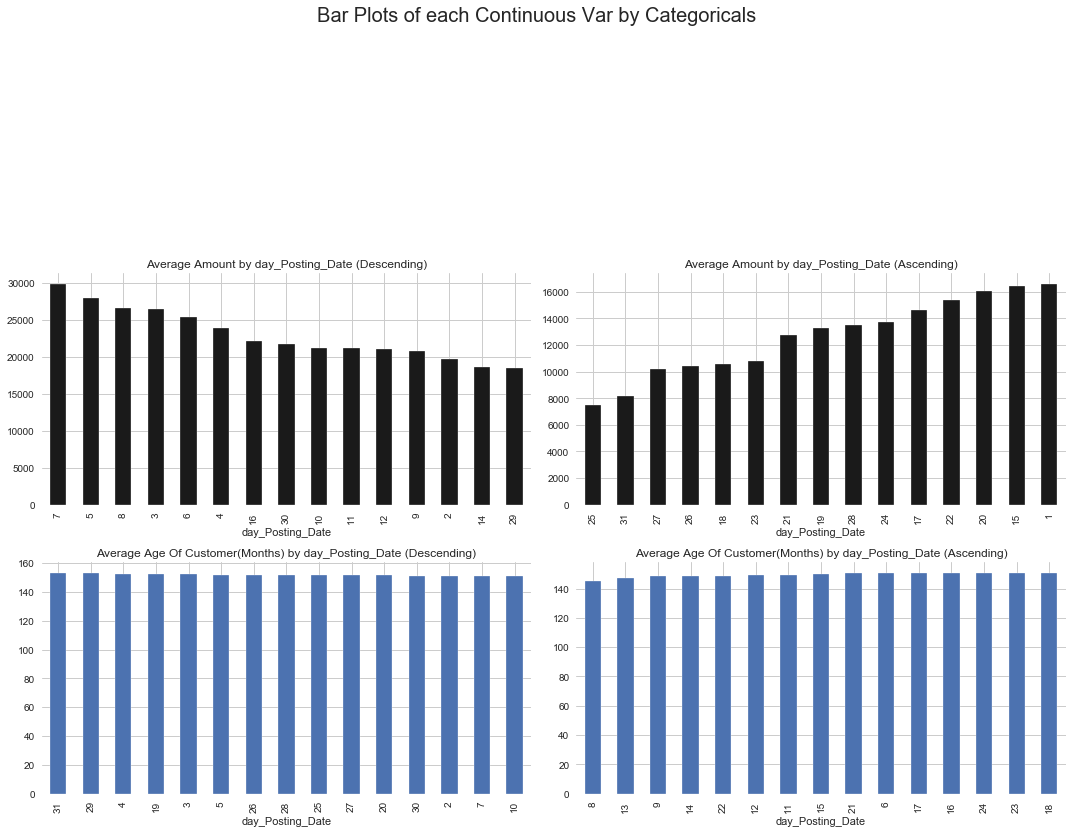

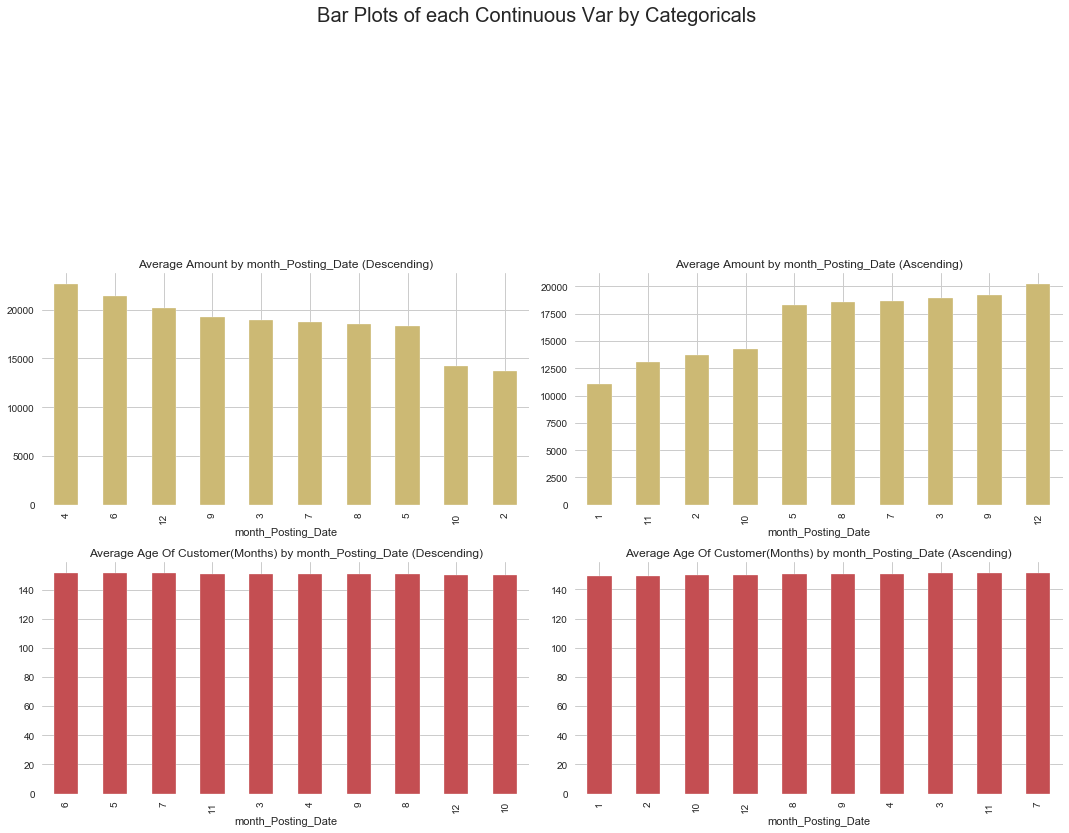

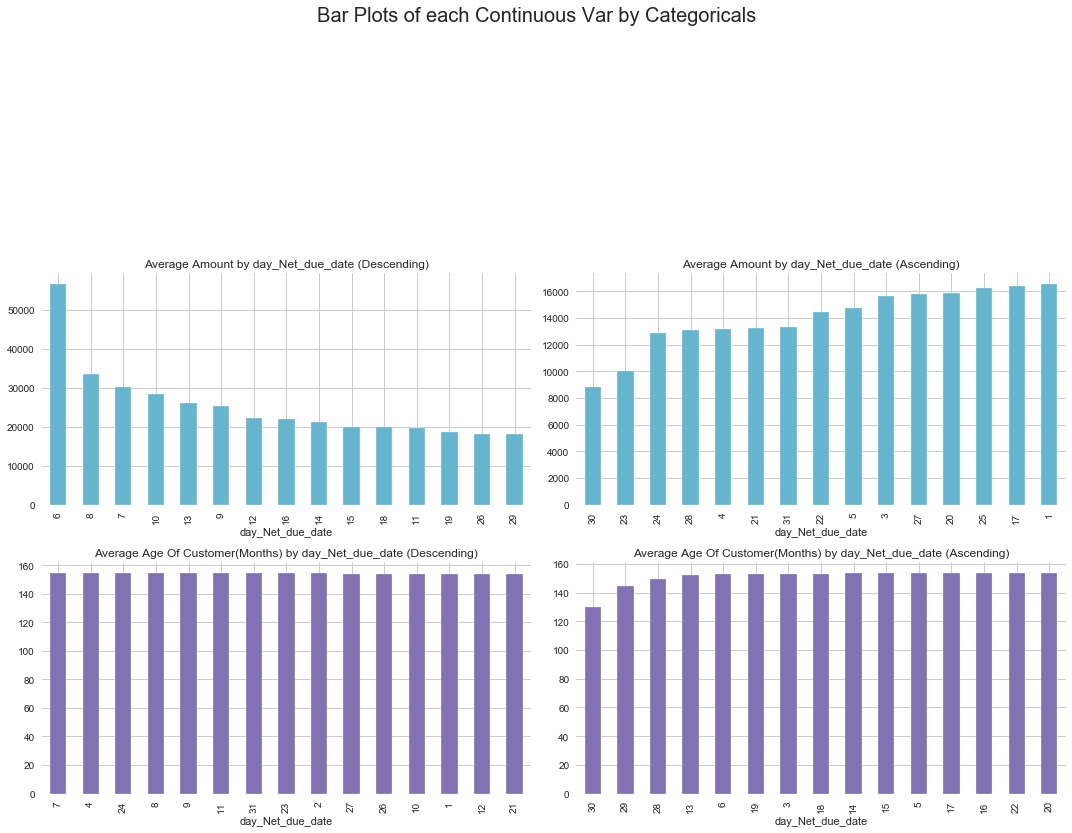

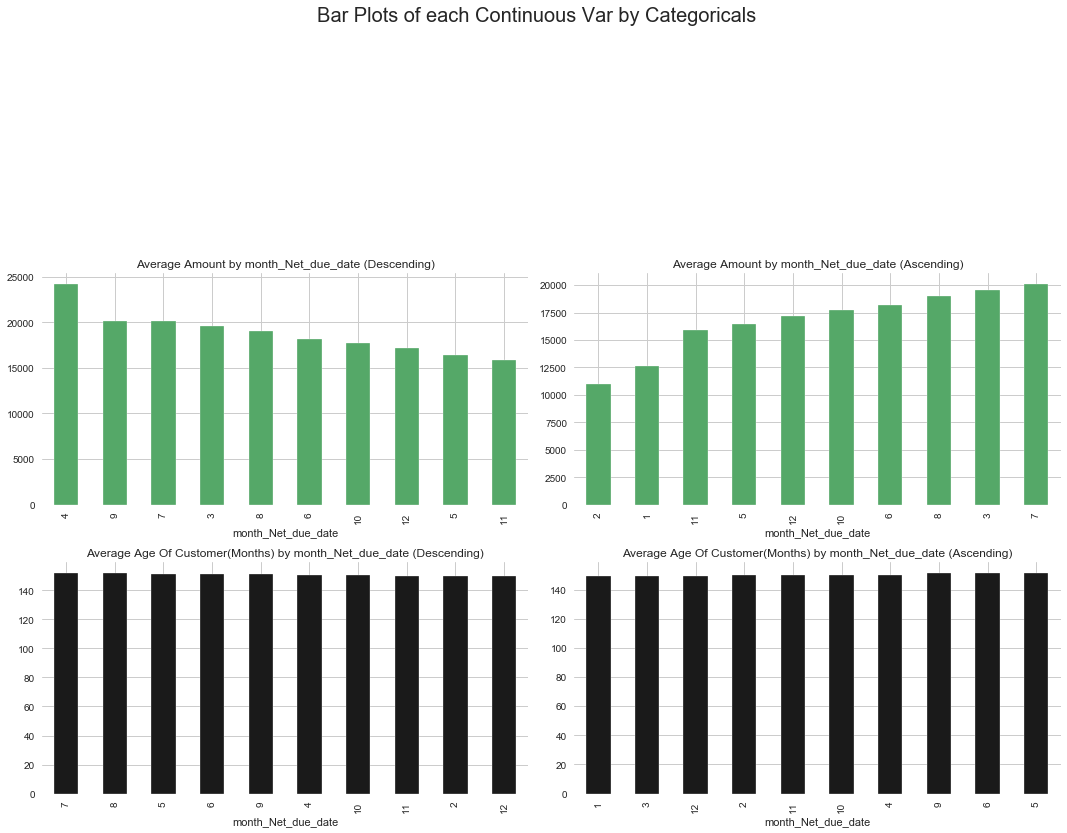

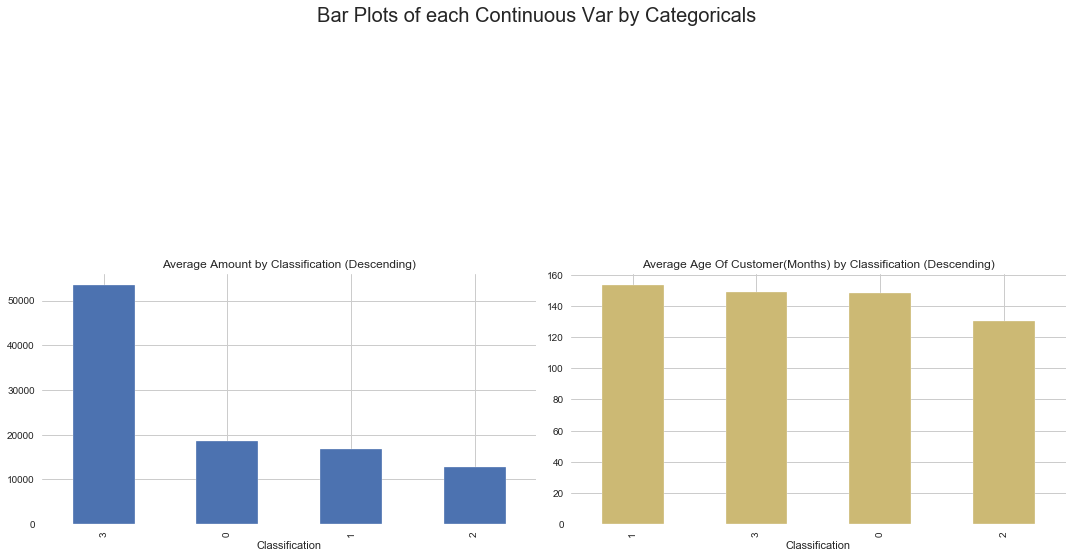

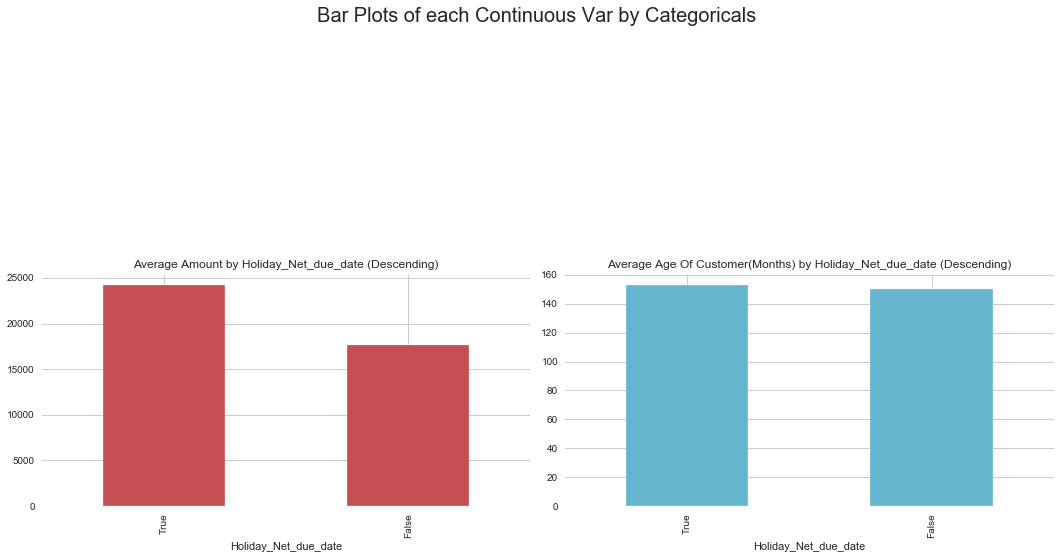

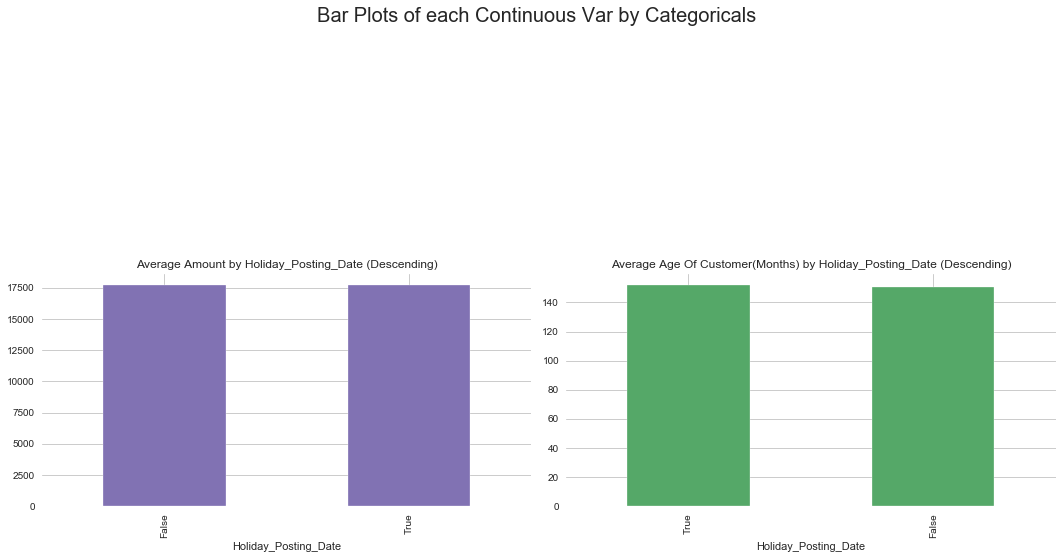

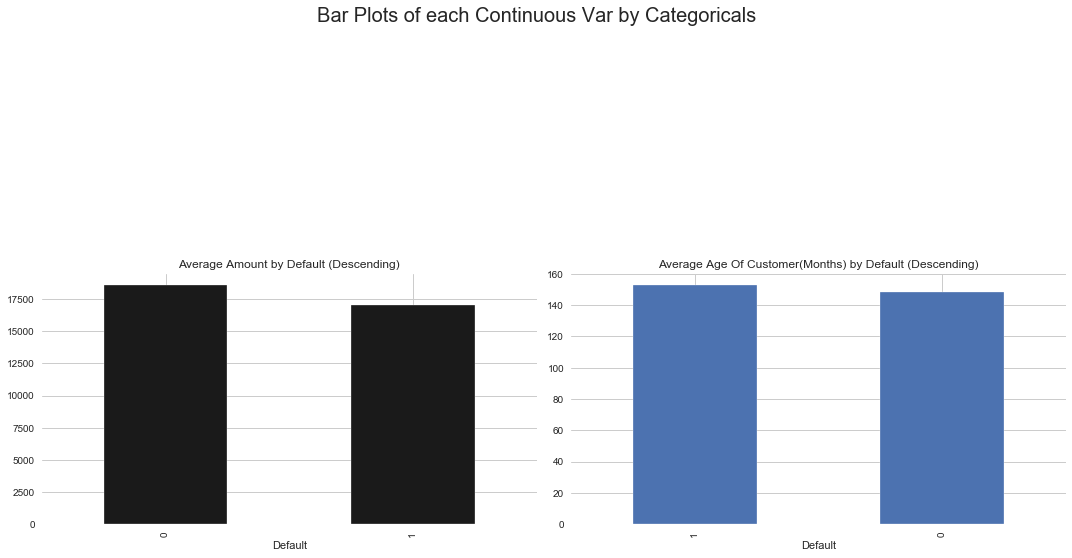

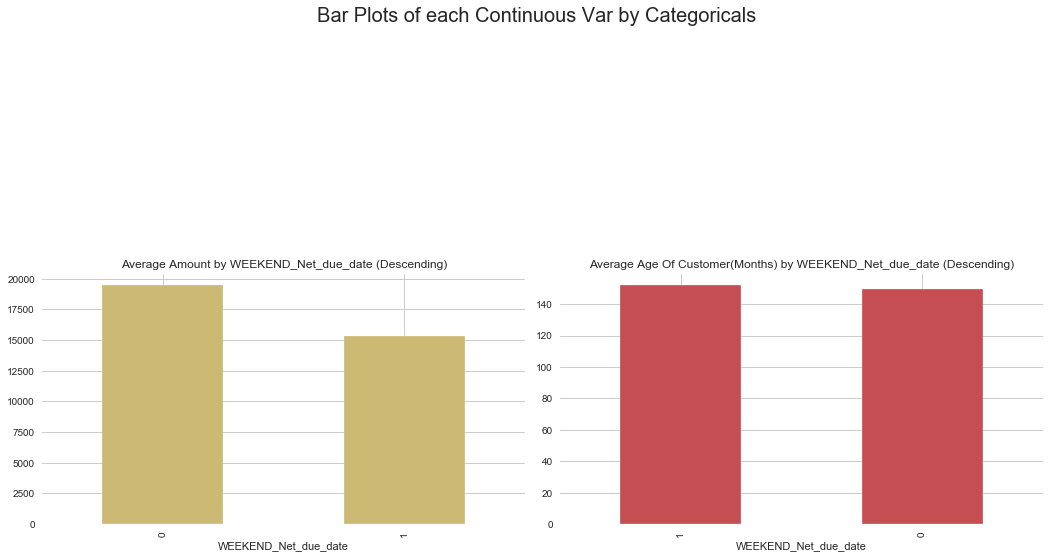

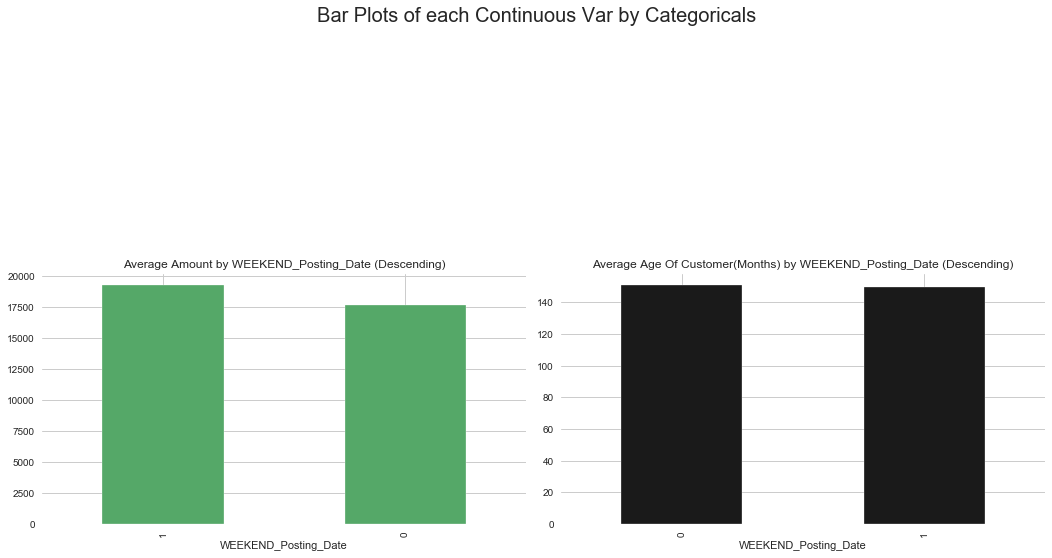

In [1391]:
import pandas as pd
from autoviz.AutoViz_Class import AutoViz_Class

#EDA using Autoviz
autoviz = AutoViz_Class().AutoViz('For nishi.csv')

In [1393]:
df2

,Payment Method description,Amount,Region,Age Of Customer(Months),Age Of Customer(Year),Payment Term,Default,day_Posting_Date,month_Posting_Date,year_Posting_Date,day_Net_due_date,month_Net_due_date,year_Net_due_date,Holiday_Net_due_date,Holiday_Posting_Date,WEEKEND_Net_due_date,WEEKEND_Posting_Date,days_of_week_Net_due_dt,days_of_week_Posting_Date,Classification
0,Direct Debits 2,23672.43,AA111,34.0,2.0,45,1,14,1,2015,28,2,2015,False,False,1,0,Saturday,Wednesday,1
1,Direct Debits 2,3689.47,AA111,34.0,2.0,45,1,14,1,2015,28,2,2015,False,False,1,0,Saturday,Wednesday,1
2,Direct Debits 2,366.84,AA111,34.0,2.0,44,1,15,1,2015,28,2,2015,False,False,1,0,Saturday,Thursday,1
3,Direct Debits 2,259.84,AA112,65.0,5.0,5,1,23,2,2015,28,2,2015,False,False,1,0,Saturday,Monday,1
4,Direct Debits 2,176.21,AA113,155.0,12.0,5,0,25,2,2015,2,3,2015,False,False,0,0,Monday,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45836,No Payment Method,33330.94,AA126,155.0,12.0,144,1,10,12,2015,3,4,2016,False,False,1,0,Sunday,Thursday,1
45837,No Payment Method,6781.28,AA126,118.0,9.0,145,0,11,10,2015,4,3,2016,False,False,0,1,Friday,Sunday,0
45838,No Payment Method,2724.62,AA126,155.0,12.0,128,0,27,11,2015,4,3,2016,False,False,0,0,Friday,Friday,0
45839,No Payment Method,2353.44,AA126,155.0,12.0,131,0,24,11,2015,4,3,2016,False,False,0,0,Friday,Tuesday,0


In [ ]:
a=df.groupby('City')['Default'].sum()
b=pd.DataFrame(a)
c=df.groupby('City')['DocumentNo']. nunique()
d=pd.DataFrame(c)


Percent_of_defaulters_by_city=pd.concat([b, d], axis=1)
Percent_of_defaulters_by_city['Percent_default']=Percent_of_defaulters_by_city['Default']/Percent_of_defaulters_by_city['DocumentNo']
y=Percent_of_defaulters_by_city.sort_values(by=['Percent_default'], ascending=False)